# **Part One:** Load in the Data
### Python Code by Frances Caroline LeMond-Glasser

In [1]:
# Import Libraries
import pandas as pd; import numpy as np; # Data Transformation
import seaborn as sns; import matplotlib.pyplot as plt; import missingno as msno # Data Visualization
pd.set_option('display.max_columns', None)

In [2]:
# Read in the file from folder
df = pd.read_csv(r"kaggle_survey_2022_responses.csv", low_memory=False)
df.head(3)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What is the highest level of formal education ...,Have you ever published any academic research ...,Did your research make use of machine learning...,Did your research make use of machine learning...,Did your research make use of machine learning...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,Which of the

# **Part Two:** Cleaning the data

### **GOAL:** Reduce dataset to variables needed to predict imcome of data scientist. 
### **Basics Meta-Data Investigation**
Not all the survey questions are relevant to this (see Q7). To achieve a higher quality dataset relevant to prediction we also must look into the missingness of the data.

In [3]:
# Check to see tha data types to know what operations can be performed.
all_objects = (df.dtypes == 'object').all()
print(all_objects)

True


In [4]:
# Collect information around missingness, size of data, and metadata.
#Dataframe information 
df = df.drop(0, axis=0).reset_index(drop=True) # The first row what the question repeated not data
print(f'Missing Cells: {df.isna().sum().sum()} \n')
print(f'DF Size (row by column): {df.shape} \n')
print(df.info())

Missing Cells: 6278219 

DF Size (row by column): (23997, 296) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB
None


### **Investigate: Mis-formatting of 0 as NaN in DF** 

- Pandas sees NaN where columns like Q6_1 are binary, reading 0 as NaN instead. We need to fix this error before any investigation.

In [5]:
# Replace the NaN-Label Columns with correct labeling of binary.
# QUESTION 6
# Create binary for each learning platform
df['Q6_Coursera'] = df['Q6_1'].notna().astype(int)
df['Q6_edX'] = df['Q6_2'].notna().astype(int)
df['Q6_Kaggle'] = df['Q6_3'].notna().astype(int)
df['Q6_DataCamp'] = df['Q6_4'].notna().astype(int)
df['Q6_Fast.ai'] = df['Q6_5'].notna().astype(int)
df['Q6_Udacity'] = df['Q6_6'].notna().astype(int)
df['Q6_Udemy'] = df['Q6_7'].notna().astype(int)
df['Q6_LinkedIn'] = df['Q6_8'].notna().astype(int)
df['Q6_Cloud'] = df['Q6_9'].notna().astype(int)
df['Q6_University'] = df['Q6_10'].notna().astype(int)
df['Q6_None'] = df['Q6_11'].notna().astype(int)
df['Q6_Other'] = df['Q6_12'].notna().astype(int)

# QUESTION 10
# Create a new binary column where 1 if not NaN in either Q10_1 (yes Machine learning used) or Q10_2 (yes machine learning used in research), else 0
df['Q10_combined'] = df[['Q10_1', 'Q10_2']].notna().any(axis=1).astype(int)

# QUESTION 12
# Create binary columns for each programming language
df['Q12_Python'] = df['Q12_1'].notna().astype(int)
df['Q12_R'] = df['Q12_2'].notna().astype(int)
df['Q12_SQL'] = df['Q12_3'].notna().astype(int)
df['Q12_C'] = df['Q12_4'].notna().astype(int)
df['Q12_C++'] = df['Q12_5'].notna().astype(int)
df['Q12_Java'] = df['Q12_6'].notna().astype(int)
df['Q12_Javascript'] = df['Q12_7'].notna().astype(int)
df['Q12_Julia'] = df['Q12_8'].notna().astype(int)
df['Q12_Bash'] = df['Q12_9'].notna().astype(int)
df['Q12_MATLAB'] = df['Q12_10'].notna().astype(int)
df['Q12_None'] = df['Q12_11'].notna().astype(int)
df['Q12_Other'] = df['Q12_12'].notna().astype(int)
df['Q12_C#'] = df['Q12_13'].notna().astype(int)
df['Q12_PHP'] = df['Q12_14'].notna().astype(int)
df['Q12_Go'] = df['Q12_15'].notna().astype(int)

# QUESTION 13
# Create binary columns for each IDE
df['Q13_JupyterLab'] = df['Q13_1'].notna().astype(int)
df['Q13_RStudio'] = df['Q13_2'].notna().astype(int)
df['Q13_VisualStudio'] = df['Q13_3'].notna().astype(int)
df['Q13_VSCode'] = df['Q13_4'].notna().astype(int)
df['Q13_PyCharm'] = df['Q13_5'].notna().astype(int)
df['Q13_Spyder'] = df['Q13_6'].notna().astype(int)
df['Q13_Notepad++'] = df['Q13_7'].notna().astype(int)
df['Q13_SublimeText'] = df['Q13_8'].notna().astype(int)
df['Q13_VimEmacs'] = df['Q13_9'].notna().astype(int)
df['Q13_MATLAB'] = df['Q13_10'].notna().astype(int)
df['Q13_JupyterNotebook'] = df['Q13_11'].notna().astype(int)
df['Q13_IntelliJ'] = df['Q13_12'].notna().astype(int)
df['Q13_None'] = df['Q13_13'].notna().astype(int)
df['Q13_Other'] = df['Q13_14'].notna().astype(int)

# QUESTION 14
# Create binary columns for each notebook type
df['Q14_KaggleNotebooks'] = df['Q14_1'].notna().astype(int)
df['Q14_ColabNotebooks'] = df['Q14_2'].notna().astype(int)
df['Q14_AzureNotebooks'] = df['Q14_3'].notna().astype(int)
df['Q14_CodeOcean'] = df['Q14_4'].notna().astype(int)
df['Q14_IBMWatsonStudio'] = df['Q14_5'].notna().astype(int)
df['Q14_AmazonSagemakerStudio'] = df['Q14_6'].notna().astype(int)
df['Q14_AmazonSagemakerStudioLab'] = df['Q14_7'].notna().astype(int)
df['Q14_AmazonEMRNotebooks'] = df['Q14_8'].notna().astype(int)
df['Q14_GoogleCloudVertexAIWorkbench'] = df['Q14_9'].notna().astype(int)
df['Q14_HexWorkspaces'] = df['Q14_10'].notna().astype(int)
df['Q14_NoteableNotebooks'] = df['Q14_11'].notna().astype(int)
df['Q14_DatabricksCollaborativeNotebooks'] = df['Q14_12'].notna().astype(int)
df['Q14_DeepnoteNotebooks'] = df['Q14_13'].notna().astype(int)
df['Q14_GradientNotebooks'] = df['Q14_14'].notna().astype(int)
df['Q14_None'] = df['Q14_15'].notna().astype(int)
df['Q14_Other'] = df['Q14_16'].notna().astype(int)

# QUESTION 15 --> To avoid too much sparcity (0s in the dataset) I will limit the number of visualization platforms because usually only matplot lib, geoplotlib, shiny, and seaborn are used.
# Create binary columns for each data visualization library
df['Q15_Matplotlib'] = df['Q15_1'].notna().astype(int)
df['Q15_Seaborn'] = df['Q15_2'].notna().astype(int)
df['Q15_Shinny'] = df['Q15_5'].notna().astype(int)
df['Q15_Geoplotlib'] = df['Q15_9'].notna().astype(int)
df['Q15_Other'] = df[['Q15_3', 'Q15_4', 'Q15_6', 'Q15_7', 'Q15_8', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15']].notna().any(axis=1).astype(int)

# QUESTION 18
# Create binary columns for each ML algorithm
df['Q18_LinearLogisticRegression'] = df['Q18_1'].notna().astype(int)
df['Q18_DecisionTreesRF'] = df['Q18_2'].notna().astype(int)
df['Q18_GradientBoosting'] = df['Q18_3'].notna().astype(int)
df['Q18_BayesianApproaches'] = df['Q18_4'].notna().astype(int)
df['Q18_EvolutionaryApproaches'] = df['Q18_5'].notna().astype(int)
df['Q18_DenseNeuralNetworks'] = df['Q18_6'].notna().astype(int)
df['Q18_ConvolutionalNeuralNetworks'] = df['Q18_7'].notna().astype(int)
df['Q18_GenerativeAdversarialNetworks'] = df['Q18_8'].notna().astype(int)
df['Q18_RecurrentNeuralNetworks'] = df['Q18_9'].notna().astype(int)
df['Q18_TransformerNetworks'] = df['Q18_10'].notna().astype(int)
df['Q18_AutoencoderNetworks'] = df['Q18_11'].notna().astype(int)
df['Q18_GraphNeuralNetworks'] = df['Q18_12'].notna().astype(int)
df['Q18_None'] = df['Q18_13'].notna().astype(int)
df['Q18_Other'] = df['Q18_14'].notna().astype(int)

# QUESTION 33
# Create binary columns for each cloud service
df['Q33_Amazon_EC2'] = df['Q33_1'].notna().astype(int)
df['Q33_Azure_VM'] = df['Q33_2'].notna().astype(int)
df['Q33_Google_Compute_Engine'] = df['Q33_3'].notna().astype(int)
df['Q33_None'] = df['Q33_4'].notna().astype(int)
df['Q33_Other'] = df['Q33_5'].notna().astype(int)

### **Multicolinarity/Repetative Questions**

- Because a lot of the questions asked in the survey will be highly correlated and repective, it will lead to issues in the predictive modeling due to multi-colinarity. "Quality not Quantity" is important here. My team and I decided to only clean questions from the survey that ADD to the information or provide unique insights into the type of data scientist we are looking at. 
- Repetitive topics included Data Science Specialty (ex: geography/GIS) and employer (ex: IBM) which are explained by the values:libraries, machine learning types, methods, software, and notebook type.

_By looking at the survey questions we know that some questions are redundant and would not add predictive capability to the models. By fixing the binary labeling of dummies from the orginial dataset and selecting the most informative features we have reduced the data set to questions:_

- Q2 - **Age**
- Q3 - **Gender**
- Q4 - **Country of Origin**
- Q5 - **Student Status**
- Q6 - **Learning Platform**
- Q8 - **Education Level**
- Q9 - **Academic Publishing**
- Q10 - **Use of Machine Learning**
- Q11 - **Years of Programming Experience**
- Q12 - **Programming Languages**
- Q13 - **Development Environment**
- Q14 - **Notebook Use**
- Q15 - **Visualization Techniques**
- Q16 - **Experience with Machine Learning**
- Q18 - **Algorithms Used**
- Q23 - **Job Title**
- Q24 - **Industry**
- Q25 - **Size of Company**
- Q29 - **Yearly Salary (Target Value)**
- Q33 - **Cloud Computing Type**

In [6]:
# Apply reduction (detailed above) to df
columns_to_keep =  ['Q2', 'Q3', 'Q4', 'Q5',
                    'Q6_Coursera', 'Q6_edX', 'Q6_Kaggle', 'Q6_DataCamp', 'Q6_Fast.ai', 'Q6_Udacity',
                    'Q6_Udemy', 'Q6_LinkedIn', 'Q6_Cloud', 'Q6_University', 'Q6_None', 'Q6_Other',
                    'Q8', 'Q9', 'Q10_combined', 'Q11','Q12_Python', 'Q12_R', 'Q12_SQL', 'Q12_C', 
                    'Q12_C++', 'Q12_Java','Q12_Javascript', 'Q12_Julia', 'Q12_Bash', 'Q12_MATLAB', 
                    'Q12_None', 'Q12_Other','Q12_C#', 'Q12_PHP', 'Q12_Go', 'Q13_JupyterLab', 
                    'Q13_RStudio', 'Q13_VisualStudio', 'Q13_VSCode', 'Q13_PyCharm', 'Q13_Spyder', 
                    'Q13_Notepad++', 'Q13_SublimeText', 'Q13_VimEmacs', 'Q13_MATLAB', 
                    'Q13_JupyterNotebook', 'Q13_IntelliJ', 'Q13_None','Q13_Other', 'Q14_KaggleNotebooks', 
                    'Q14_ColabNotebooks', 'Q14_AzureNotebooks',  'Q14_CodeOcean', 'Q14_IBMWatsonStudio', 
                    'Q14_AmazonSagemakerStudio', 'Q14_AmazonSagemakerStudioLab', 'Q14_AmazonEMRNotebooks', 
                    'Q14_GoogleCloudVertexAIWorkbench', 'Q14_HexWorkspaces', 'Q14_NoteableNotebooks', 
                    'Q14_DatabricksCollaborativeNotebooks','Q14_DeepnoteNotebooks', 'Q14_GradientNotebooks',
                    'Q14_None', 'Q14_Other', 'Q15_Matplotlib', 'Q15_Seaborn', 'Q15_Shinny', 'Q15_Geoplotlib', 
                    'Q15_Other', 'Q16', 'Q18_LinearLogisticRegression', 'Q18_DecisionTreesRF', 'Q18_GradientBoosting', 
                    'Q18_BayesianApproaches', 'Q18_EvolutionaryApproaches','Q18_DenseNeuralNetworks', 
                    'Q18_ConvolutionalNeuralNetworks', 'Q18_GenerativeAdversarialNetworks',
                    'Q18_RecurrentNeuralNetworks', 'Q18_TransformerNetworks', 'Q18_AutoencoderNetworks',
                    'Q18_GraphNeuralNetworks', 'Q18_None', 'Q18_Other', 'Q23', 'Q24', 'Q25', 'Q29', 
                    'Q33_Amazon_EC2', 'Q33_Azure_VM', 'Q33_Google_Compute_Engine', 'Q33_None', 'Q33_Other']
new_df = df[columns_to_keep]
new_df.head()

,Q2,Q3,Q4,Q5,Q6_Coursera,Q6_edX,Q6_Kaggle,Q6_DataCamp,Q6_Fast.ai,Q6_Udacity,Q6_Udemy,Q6_LinkedIn,Q6_Cloud,Q6_University,Q6_None,Q6_Other,Q8,Q9,Q10_combined,Q11,Q12_Python,Q12_R,Q12_SQL,Q12_C,Q12_C++,Q12_Java,Q12_Javascript,Q12_Julia,Q12_Bash,Q12_MATLAB,Q12_None,Q12_Other,Q12_C#,Q12_PHP,Q12_Go,Q13_JupyterLab,Q13_RStudio,Q13_VisualStudio,Q13_VSCode,Q13_PyCharm,Q13_Spyder,Q13_Notepad++,Q13_SublimeText,Q13_VimEmacs,Q13_MATLAB,Q13_JupyterNotebook,Q13_IntelliJ,Q13_None,Q13_Other,Q14_KaggleNotebooks,Q14_ColabNotebooks,Q14_AzureNotebooks,Q14_CodeOcean,Q14_IBMWatsonStudio,Q14_AmazonSagemakerStudio,Q14_AmazonSagemakerStudioLab,Q14_AmazonEMRNotebooks,Q14_GoogleCloudVertexAIWorkbench,Q14_HexWorkspaces,Q14_NoteableNotebooks,Q14_DatabricksCollaborativeNotebooks,Q14_DeepnoteNotebooks,Q14_GradientNotebooks,Q14_None,Q14_Other,Q15_Matplotlib,Q15_Seaborn,Q15_Shinny,Q15_Geoplotlib,Q15_Other,Q16,Q18_LinearLogisticRegression,Q18_DecisionTreesRF,Q18_GradientBoosting,Q18_BayesianApproaches,Q18_EvolutionaryApproaches,Q18_DenseNeuralNetworks,Q18_ConvolutionalNeuralNetworks,Q18_GenerativeAdversarialNetworks,Q18_RecurrentNeuralNetworks,Q18_TransformerNetworks,Q18_AutoencoderNetworks,Q18_GraphNeuralNetworks,Q18_None,Q18_Other,Q23,Q24,Q25,Q29,Q33_Amazon_EC2,Q33_Azure_VM,Q33_Google_Compute_Engine,Q33_None,Q33_Other
0,30-34,Man,India,No,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0
1,30-34,Man,Algeria,No,0,0,0,0,0,0,0,0,0,1,0,0,Master’s degree,Yes,0,1-3 years,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Under 1 year,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0
2,18-21,Man,Egypt,Yes,1,1,0,1,0,1,1,1,0,1,0,0,Bachelor’s degree,NaN,0,1-3 years,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1-2 years,1,1,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0
3,55-59,Man,France,No,1,0,1,0,0,0,1,0,0,0,0,1,Some college/university study without earning ...,NaN,0,10-20 years,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1-2 years,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Data Scientist,Online Service/Internet-based Services,0-49 employees,"25,000-29,999",0,0,0,0,0
4,45-49,Man,India,Yes,0,0,0,0,0,0,0,0,0,0,0,1,Bachelor’s degree,NaN,0,5-10 years,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,I do not use machine learning methods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0


### **Missingness**

Now, we have a partially dummified dataframe with lots of missingness. Before we make more dummies with k-1 columns, we should check to see if the non-dummies (multiple choice questions) from the orginial dataset have more than 30% missing data. If the feature has more than 30% missing then it will be dropped but if it has less, then the mode will be imputed for that value if it is character or mean if the variable is numeric.

In [7]:
#Print columns with missing cells
print(f'New Data Frame Size: {new_df.shape}')
print(f'Number of missing cells: {new_df.isnull().sum().sum()}') # WOW!! Alot of missing cells... lets see if there is a trend for this.

New Data Frame Size: (23997, 94)
Number of missing cells: 76162


In [8]:
# Create df to filter columns with the most missing values
missing_percent = (new_df.isnull().sum() / len(new_df)) * 100
missing_df = pd.DataFrame({'column': missing_percent.index, 'missing_percent': missing_percent.values})
missing_df = missing_df[missing_df['missing_percent'] > 0]
missing_df = missing_df.sort_values(by='missing_percent', ascending=False)
missing_df = missing_df.reset_index(drop=True)
missing_df_transposed = missing_df.set_index('column').T
missing_df_transposed.head() 

column,Q29,Q25,Q24,Q23,Q9,Q16,Q11,Q8
missing_percent,66.095762,62.220278,62.103596,55.702796,48.489395,17.131308,3.142059,2.496145


Wow! That is alot of survey questions where the response is missing half the responses (Q29 missing 66%, Q25 missing 62%, etc.). We should drop these columns do to inability to impute or use them in prediction as they are rare events if someone did in fact use that software or notebook type. Additionally, if we don't know Question 29 (salary) which is our target variable, we can't use the observation in prediction.

**_NOTE:_** we need to drop rows without the y vairbale (Q29) first because more than 30% of Q29's data is missing and we cannot filter out that feature because that is what we are predicting.

In [9]:
new_df = new_df.dropna(subset=['Q29'])                 # Drop rows without response variable

# Filter out columns with lots of missing data
missing_percent = (new_df.isnull().sum() / len(new_df)) * 100  # Calculate the percentage of missing values for each column
columns_to_drop = missing_percent[missing_percent > 30].index  # Filter out columns with more than 30% missing values
df_cleaned = new_df.drop(columns=columns_to_drop)              # Drop those columns from the DataFrame
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.head()

,Q2,Q3,Q4,Q5,Q6_Coursera,Q6_edX,Q6_Kaggle,Q6_DataCamp,Q6_Fast.ai,Q6_Udacity,Q6_Udemy,Q6_LinkedIn,Q6_Cloud,Q6_University,Q6_None,Q6_Other,Q8,Q10_combined,Q11,Q12_Python,Q12_R,Q12_SQL,Q12_C,Q12_C++,Q12_Java,Q12_Javascript,Q12_Julia,Q12_Bash,Q12_MATLAB,Q12_None,Q12_Other,Q12_C#,Q12_PHP,Q12_Go,Q13_JupyterLab,Q13_RStudio,Q13_VisualStudio,Q13_VSCode,Q13_PyCharm,Q13_Spyder,Q13_Notepad++,Q13_SublimeText,Q13_VimEmacs,Q13_MATLAB,Q13_JupyterNotebook,Q13_IntelliJ,Q13_None,Q13_Other,Q14_KaggleNotebooks,Q14_ColabNotebooks,Q14_AzureNotebooks,Q14_CodeOcean,Q14_IBMWatsonStudio,Q14_AmazonSagemakerStudio,Q14_AmazonSagemakerStudioLab,Q14_AmazonEMRNotebooks,Q14_GoogleCloudVertexAIWorkbench,Q14_HexWorkspaces,Q14_NoteableNotebooks,Q14_DatabricksCollaborativeNotebooks,Q14_DeepnoteNotebooks,Q14_GradientNotebooks,Q14_None,Q14_Other,Q15_Matplotlib,Q15_Seaborn,Q15_Shinny,Q15_Geoplotlib,Q15_Other,Q16,Q18_LinearLogisticRegression,Q18_DecisionTreesRF,Q18_GradientBoosting,Q18_BayesianApproaches,Q18_EvolutionaryApproaches,Q18_DenseNeuralNetworks,Q18_ConvolutionalNeuralNetworks,Q18_GenerativeAdversarialNetworks,Q18_RecurrentNeuralNetworks,Q18_TransformerNetworks,Q18_AutoencoderNetworks,Q18_GraphNeuralNetworks,Q18_None,Q18_Other,Q23,Q24,Q25,Q29,Q33_Amazon_EC2,Q33_Azure_VM,Q33_Google_Compute_Engine,Q33_None,Q33_Other
0,55-59,Man,France,No,1,0,1,0,0,0,1,0,0,0,0,1,Some college/university study without earning ...,0,10-20 years,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1-2 years,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Data Scientist,Online Service/Internet-based Services,0-49 employees,"25,000-29,999",0,0,0,0,0
1,30-34,Man,Germany,No,1,1,0,0,0,1,1,0,0,0,0,0,Bachelor’s degree,0,10-20 years,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,4-5 years,1,0,0,1,0,0,0,0,1,1,0,1,0,0,Software Engineer,Insurance/Risk Assessment,250-999 employees,"100,000-124,999",0,0,0,0,0
2,70+,Man,Australia,No,1,0,1,0,0,0,0,0,0,0,0,0,Doctoral degree,1,20+ years,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5-10 years,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Research Scientist,Government/Public Service,"1000-9,999 employees","100,000-124,999",1,0,0,0,0
3,40-44,Man,United States of America,No,1,0,1,0,1,1,1,0,0,0,0,1,Doctoral degree,1,10-20 years,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,5-10 years,1,1,1,0,0,1,1,0,0,1,0,0,0,0,Developer Advocate,Computers/Technology,"1000-9,999 employees","200,000-249,999",1,1,0,0,0
4,40-44,Man,United States of America,No,1,0,0,0,0,1,1,0,1,0,0,0,Master’s degree,1,10-20 years,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,5-10 years,1,1,1,1,0,1,0,0,1,0,0,1,0,0,Data Scientist,Computers/Technology,"1000-9,999 employees","200,000-249,999",0,1,0,0,0


### **Impute for Missing**

In [10]:
columns_with_missing = df_cleaned.columns[df_cleaned.isnull().any()].tolist() # Get columns with missing values
print(columns_with_missing) # Display the list of columns with missing values

['Q16']


In [11]:
# Impute for Column Q16
mode_value = df_cleaned['Q16'].mode()[0]
df_cleaned['Q16'] = df_cleaned['Q16'].fillna(mode_value)
print(f'Number of missing values: {df_cleaned.isna().sum().sum()}')

Number of missing values: 0


### **Region of Orgin**

In [12]:
# Define country to region mapping
country_to_region = {
   
    # Individual Countries with large populations in Data Science
    'United States of America': 'USA', 
    'India': 'India',

    # Americas
    'Canada': 'Americas',  'Mexico': 'Americas', 'Colombia': 'Americas', 'Chile': 'Americas',
    'Ecuador': 'Americas', 'Peru': 'Americas','Brazil': 'Americas', 'Argentina': 'Americas', 
    
    # Europe
    'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Netherlands': 'Europe', 'Portugal': 'Europe', 'Poland': 'Europe',
    'Romania': 'Europe', 'Belgium': 'Europe', 'Ireland': 'Europe',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Czech Republic': 'Europe', 'Ukraine': 'Europe', 'Russia': 'Europe',

    # Middle East
    'Turkey': 'Middle East', 'Saudi Arabia': 'Middle East', 'Israel': 'Middle East',
    'Iran, Islamic Republic of...': 'Middle East', 'United Arab Emirates': 'Middle East',

    # Africa
    'Nigeria': 'Africa', 'Cameroon': 'Africa', 'Ethiopia': 'Africa',  'Tunisia': 'Africa',
    'Egypt': 'Africa', 'Ghana': 'Africa', 'South Africa': 'Africa', 'Kenya': 'Africa',
    'Morocco': 'Africa', 'Algeria': 'Africa', 'Zimbabwe': 'Africa',

    # East Asia
    'Japan': 'East Asia', 'South Korea': 'East Asia','China': 'East Asia',
    'Taiwan': 'East Asia', 'Hong Kong (S.A.R.)': 'East Asia', 'Singapore': 'East Asia',

    # Central-South Asia
    'Indonesia': 'Central-South Asia', 'Philippines': 'Central-South Asia', 'Thailand': 'Central-South Asia',
    'Malaysia': 'Central-South Asia', 'Viet Nam': 'Central-South Asia', 'Nepal': 'Central-South Asia',
    'Pakistan': 'Central-South Asia', 'Bangladesh': 'Central-South Asia','Sri Lanka': 'Central-South Asia',
    
    # Other / Not Disclosed
    'Other': 'Other', 'I do not wish to disclose my location': 'Other',  'Australia': 'Other',
}

# Now map your column
df_cleaned['Q4'] = df_cleaned['Q4'].map(country_to_region)
df_cleaned['Q4'].unique()

array(['Europe', 'Other', 'USA', 'East Asia', 'Americas',
       'Central-South Asia', 'India', 'Middle East', 'Africa'],
      dtype=object)

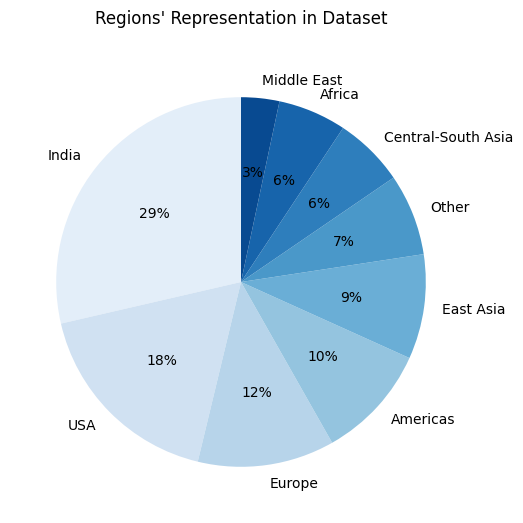

In [13]:
# Count the occurrences of each unique value in the Q4 column
q4_counts = df_cleaned['Q4'].value_counts()

# Create the pie chart using the "BuGn" color palette from Seaborn
plt.figure(figsize=(8, 6))

# Define autopct function for rounded percentages
def autopct_rounded(pct, allvalues):
    return f"{pct:.0f}%"  # Round percentages to whole numbers

# Create the pie chart with the "BuGn" palette
plt.pie(q4_counts, labels=q4_counts.index, autopct=lambda pct: autopct_rounded(pct, q4_counts), startangle=90, colors=sns.color_palette("Blues", len(q4_counts)))
plt.title("Regions' Representation in Dataset", pad=20)
plt.show()

### **Ordinal Education Variable** (Q8)

In [14]:
mapping = {"I prefer not to answer": 0, 
           "No formal education past high school" : 1,
           "Some college/university study without earning a bachelor’s degree" : 2,
           "Bachelor’s degree" : 3, 
           "Master’s degree" : 4,
           "Doctoral degree" : 5, 
           "Professional doctorate" : 5}

df_cleaned["Q8"] = df_cleaned["Q8"].map(mapping)
df_cleaned['Q8'].unique()

array([2, 3, 5, 4, 0, 1], dtype=int64)

### **Ordinal Variable: Experience Programming** (Q11)

In [15]:
# Map Q11 to numeric values (estimated midpoints for ranges)
experience_mapping = {
    'I have never written code': 0,
    '< 1 years': 1,
    '1-3 years': 2,
    '3-5 years': 4,
    '5-10 years': 7,
    '10-20 years': 15,
    '20+ years': 25}

# Relabel
df_cleaned['Q11'] = df_cleaned['Q11'].map(experience_mapping)
df_cleaned['Q11'].unique()

array([15, 25,  7,  4,  1,  2,  0], dtype=int64)

### **Ordinal Variable: Experience Machine Learning** (Q16)

In [16]:
# Mapping ML experience levels to numeric values
ml_experience_mapping = {
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 7,
    '10-20 years': 15,
    '20+ years': 20}

# Relabel
df_cleaned['Q16'] = df_cleaned['Q16'].map(ml_experience_mapping)
df_cleaned['Q16'].unique()

array([ 2,  5,  7,  3,  1,  4, 15,  0], dtype=int64)

### **Finish Creating Dummies**

In [17]:
df_cleaned['Q5'].unique() # Result is 'No', no survey participant has published a paper.
df_cleaned.drop(columns='Q5', axis=1, inplace=True) # Drop this column as it has no predictive ability.

df_cleaned['Q3'].unique() # Has many options but we will simplify to Man, Woman, and Other to increase the distribution of observations to train on for each answer type.
df_cleaned['is_man'] = (df_cleaned['Q3'] == 'Man').astype(int)       # Binary for men
df_cleaned['is_woman'] = (df_cleaned['Q3'] == 'Woman').astype(int)   # Binary for women
df_cleaned['other'] = df_cleaned['Q3'].isin(['Prefer not to say', 'Prefer to self-describe', 'Nonbinary']).astype(int)
df_cleaned.drop(columns='Q3', axis=1, inplace=True)

In [18]:
columns_to_dummies = ['Q2', 'Q4', 'Q23', 'Q24', 'Q25'] # Do not dummy Q29
df_dummies = pd.get_dummies(df_cleaned, columns=columns_to_dummies)
df_dummies = df_dummies.reset_index(drop=True)
df_dummies.head()

,Q6_Coursera,Q6_edX,Q6_Kaggle,Q6_DataCamp,Q6_Fast.ai,Q6_Udacity,Q6_Udemy,Q6_LinkedIn,Q6_Cloud,Q6_University,Q6_None,Q6_Other,Q8,Q10_combined,Q11,Q12_Python,Q12_R,Q12_SQL,Q12_C,Q12_C++,Q12_Java,Q12_Javascript,Q12_Julia,Q12_Bash,Q12_MATLAB,Q12_None,Q12_Other,Q12_C#,Q12_PHP,Q12_Go,Q13_JupyterLab,Q13_RStudio,Q13_VisualStudio,Q13_VSCode,Q13_PyCharm,Q13_Spyder,Q13_Notepad++,Q13_SublimeText,Q13_VimEmacs,Q13_MATLAB,Q13_JupyterNotebook,Q13_IntelliJ,Q13_None,Q13_Other,Q14_KaggleNotebooks,Q14_ColabNotebooks,Q14_AzureNotebooks,Q14_CodeOcean,Q14_IBMWatsonStudio,Q14_AmazonSagemakerStudio,Q14_AmazonSagemakerStudioLab,Q14_AmazonEMRNotebooks,Q14_GoogleCloudVertexAIWorkbench,Q14_HexWorkspaces,Q14_NoteableNotebooks,Q14_DatabricksCollaborativeNotebooks,Q14_DeepnoteNotebooks,Q14_GradientNotebooks,Q14_None,Q14_Other,Q15_Matplotlib,Q15_Seaborn,Q15_Shinny,Q15_Geoplotlib,Q15_Other,Q16,Q18_LinearLogisticRegression,Q18_DecisionTreesRF,Q18_GradientBoosting,Q18_BayesianApproaches,Q18_EvolutionaryApproaches,Q18_DenseNeuralNetworks,Q18_ConvolutionalNeuralNetworks,Q18_GenerativeAdversarialNetworks,Q18_RecurrentNeuralNetworks,Q18_TransformerNetworks,Q18_AutoencoderNetworks,Q18_GraphNeuralNetworks,Q18_None,Q18_Other,Q29,Q33_Amazon_EC2,Q33_Azure_VM,Q33_Google_Compute_Engine,Q33_None,Q33_Other,is_man,is_woman,other,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q2_60-69,Q2_70+,Q4_Africa,Q4_Americas,Q4_Central-South Asia,Q4_East Asia,Q4_Europe,Q4_India,Q4_Middle East,Q4_Other,Q4_USA,Q23_Data Administrator,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q23_Data Architect,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Other,Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor,Q24_Academics/Education,Q24_Accounting/Finance,Q24_Broadcasting/Communications,Q24_Computers/Technology,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Other,Q24_Retail/Sales,Q24_Shipping/Transportation,Q25_0-49 employees,"Q25_10,000 or more employees","Q25_1000-9,999 employees",Q25_250-999 employees,Q25_50-249 employees
0,1,0,1,0,0,0,1,0,0,0,0,1,2,0,15,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"25,000-29,999",0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
1,1,1,0,0,0,1,1,0,0,0,0,0,3,0,15,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,5,1,0,0,1,0,0,0,0,1,1,0,1,0,0,"100,000-124,999",0,0,0,0,0,1,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1,0,1,0,0,0,0,0,0,0,0,0,5,1,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,"100,000-124,999",1,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1,0,1,0,1,1,1,0,0,0,0,1,5,1,15,1,1,1,0,0,0,0,0,0

### **Change Salary from Categorical to Numeric**

Salary is currently listed in a range so in order to convert this multiclassification problem into regression, we should take the midpoint of the range, creating a single numeric value.

In [19]:
# Divides the string in part zero (lower bound of range) and part one (upper bound of range)
df_dummies[['Q29_lower', 'Q29_upper']] = df_dummies['Q29'].str.split('-', expand=True)
bounds = ['Q29_lower', 'Q29_upper']

# Loop through the bounds and clean/convert them
for bound in bounds: df_dummies[bound] = df_dummies[bound].str.replace('[$,>]', '', regex=True).astype(float)

# Calculate the midpoint by averaging the lower and upper bounds
df_dummies['Q29_midpoint'] = (df_dummies['Q29_lower'] + df_dummies['Q29_upper']) / 2
df_dummies.drop(columns=['Q29', 'Q29_lower', 'Q29_upper'], inplace=True) # Drop the original 'Q29' column

# **Part Three:** Export Data

### Make Data Ready to Export

The previously made dummies are still in boolean values so we must make these numeric. Secondly, we need to chekc that eveything is numeric and there is no missing so that we can create  decision tree and lasso regression.

In [20]:
# Convert all columns to integers (This makes the True False Boolean values above into Integers for Training the models)
df_dummies[df_dummies.select_dtypes(include=['bool']).columns] = df_dummies.select_dtypes(include=['bool']).astype(int)

#Check the DF
print(f'Missing Values: {df_dummies.isnull().sum().sum()}') #should be zero
df_dummies = df_dummies.dropna(subset=['Q29_midpoint'])
print(f'Missing Values Post-Midpoint Drop: {df_dummies.isnull().sum().sum()}') #should be zero
print(df_dummies.dtypes)

Missing Values: 23
Missing Values Post-Midpoint Drop: 0
Q6_Coursera                       int32
Q6_edX                            int32
Q6_Kaggle                         int32
Q6_DataCamp                       int32
Q6_Fast.ai                        int32
                                 ...   
Q25_10,000 or more employees      int32
Q25_1000-9,999 employees          int32
Q25_250-999 employees             int32
Q25_50-249 employees              int32
Q29_midpoint                    float64
Length: 143, dtype: object


### Export Data

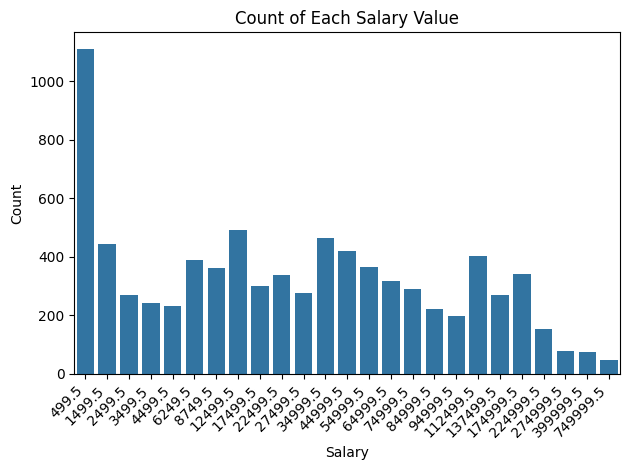

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(data=df_dummies, x='Q29_midpoint')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Count of Each Salary Value')

# Display the plot
plt.tight_layout()
plt.show()

In [22]:
df_dummies.head(10)

,Q6_Coursera,Q6_edX,Q6_Kaggle,Q6_DataCamp,Q6_Fast.ai,Q6_Udacity,Q6_Udemy,Q6_LinkedIn,Q6_Cloud,Q6_University,Q6_None,Q6_Other,Q8,Q10_combined,Q11,Q12_Python,Q12_R,Q12_SQL,Q12_C,Q12_C++,Q12_Java,Q12_Javascript,Q12_Julia,Q12_Bash,Q12_MATLAB,Q12_None,Q12_Other,Q12_C#,Q12_PHP,Q12_Go,Q13_JupyterLab,Q13_RStudio,Q13_VisualStudio,Q13_VSCode,Q13_PyCharm,Q13_Spyder,Q13_Notepad++,Q13_SublimeText,Q13_VimEmacs,Q13_MATLAB,Q13_JupyterNotebook,Q13_IntelliJ,Q13_None,Q13_Other,Q14_KaggleNotebooks,Q14_ColabNotebooks,Q14_AzureNotebooks,Q14_CodeOcean,Q14_IBMWatsonStudio,Q14_AmazonSagemakerStudio,Q14_AmazonSagemakerStudioLab,Q14_AmazonEMRNotebooks,Q14_GoogleCloudVertexAIWorkbench,Q14_HexWorkspaces,Q14_NoteableNotebooks,Q14_DatabricksCollaborativeNotebooks,Q14_DeepnoteNotebooks,Q14_GradientNotebooks,Q14_None,Q14_Other,Q15_Matplotlib,Q15_Seaborn,Q15_Shinny,Q15_Geoplotlib,Q15_Other,Q16,Q18_LinearLogisticRegression,Q18_DecisionTreesRF,Q18_GradientBoosting,Q18_BayesianApproaches,Q18_EvolutionaryApproaches,Q18_DenseNeuralNetworks,Q18_ConvolutionalNeuralNetworks,Q18_GenerativeAdversarialNetworks,Q18_RecurrentNeuralNetworks,Q18_TransformerNetworks,Q18_AutoencoderNetworks,Q18_GraphNeuralNetworks,Q18_None,Q18_Other,Q33_Amazon_EC2,Q33_Azure_VM,Q33_Google_Compute_Engine,Q33_None,Q33_Other,is_man,is_woman,other,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q2_60-69,Q2_70+,Q4_Africa,Q4_Americas,Q4_Central-South Asia,Q4_East Asia,Q4_Europe,Q4_India,Q4_Middle East,Q4_Other,Q4_USA,Q23_Data Administrator,"Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Q23_Data Architect,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Other,Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor,Q24_Academics/Education,Q24_Accounting/Finance,Q24_Broadcasting/Communications,Q24_Computers/Technology,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Other,Q24_Retail/Sales,Q24_Shipping/Transportation,Q25_0-49 employees,"Q25_10,000 or more employees","Q25_1000-9,999 employees",Q25_250-999 employees,Q25_50-249 employees,Q29_midpoint
0,1,0,1,0,0,0,1,0,0,0,0,1,2,0,15,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,27499.5
1,1,1,0,0,0,1,1,0,0,0,0,0,3,0,15,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,5,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,112499.5
2,1,0,1,0,0,0,0,0,0,0,0,0,5,1,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,112499.5
3,1,0,1,0,1,1,1,0,0,0,0,1,5,1,15,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,7,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,224999.5
4,1,0,0,0,0,1,1,0,1,0,0,0,4,1,15,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,7,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,224999.5
5,1,0,1,0,0,1,1,0,0,0,0,0,4,1,7,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,

In [23]:
# Export the cleaned dataframe to a CSV file
df_dummies.to_csv('Cleaned_Salary_Data.csv', index=False)

# **MODEL ANAYSIS**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [25]:
# Define X and y
data = df_dummies.copy()

X = data.drop(columns=['Q29_midpoint'])  # or select specific columns you want
y = data['Q29_midpoint']

In [26]:
#Split into test and train data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear Model for Analysis**

_By using linear regression we can estimate coefficients to see how important each factor is to predicting data scientist salary_

In [27]:
# Initialize model
lr = LinearRegression()

# Train (fit)
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict
y_pred = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 69617.41
R² Score: 0.39


In [29]:
# Which features are important?
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                    Feature   Coefficient
95                 Q2_50-54  2.647518e+15
88                 Q2_18-21  2.647518e+15
93                 Q2_40-44  2.647518e+15
96                 Q2_55-59  2.647518e+15
92                 Q2_35-39  2.647518e+15
..                      ...           ...
120        Q23_Statistician -2.929048e+15
108  Q23_Data Administrator -2.929048e+15
85                   is_man -6.227809e+15
87                    other -6.227809e+15
86                 is_woman -6.227809e+15

[142 rows x 2 columns]


### **Lasso Version of Model**

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Define your X (features) and y (target)
X = data.drop(columns=['Q29_midpoint'])  # Drop the target column (Q29_midpoint) from X
y = data['Q29_midpoint']  # Set target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso model (you can adjust alpha to control regularization)
lasso = Lasso(alpha=0.3)  # You can try different values of alpha

# Fit the model on the training data
lasso.fit(X_train, y_train)

C:\Users\lemon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.084e+11, tolerance: 4.664e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3)

In [32]:
# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

Root Mean Squared Error (RMSE): 69614.81
R² Score: 0.39


In [33]:
# Get the absolute value of the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

# Sort by the absolute value of the coefficients (in descending order)
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
top_10_features = coefficients.sort_values(by='AbsCoefficient', ascending=False).head(10)

# Print the top 10 most important features
print(top_10_features[['Feature', 'Coefficient']])

                                               Feature   Coefficient
107                                             Q4_USA  62453.582529
101                              Q4_Central-South Asia -38277.644316
53                                   Q14_HexWorkspaces  34078.343160
104                                           Q4_India -32086.712613
99                                           Q4_Africa -29726.973572
100                                        Q4_Americas -28944.189427
27                                              Q12_C#  24000.516451
102                                       Q4_East Asia -23855.981807
116  Q23_Manager (Program, Project, Operations, Exe...  21511.668803
106                                           Q4_Other -20599.360601


### **Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [35]:
# Initialize the Decision Tree Regressor model with constraints
regressor = DecisionTreeRegressor(random_state=42, min_samples_leaf=15, max_depth=5)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')


Root Mean Squared Error (RMSE): 69350.98
R^2 Score: 0.40


**Visualize features of importance**

In [36]:
# Get feature importances
feature_importance = regressor.feature_importances_

# Create a DataFrame for feature importance and sort by importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = importance_df.head(10)
top_10_features.head(10)

,Feature,Importance
107,Q4_USA,0.581849
65,Q16,0.181195
14,Q11,0.057029
125,Q24_Computers/Technology,0.034642
138,"Q25_10,000 or more employees",0.031854
122,Q24_Academics/Education,0.028579
123,Q24_Accounting/Finance,0.019682
116,"Q23_Manager (Program, Project, Operations, Exe...",0.013458
112,Q23_Data Scientist,0.011569
13,Q10_combined,0.010643


In [37]:
# Rename for pettier graphing
new_features = ['Country: USA', 'ML Experience', 'Programming Experience', 'Industry: Technology', 'Company: 10,000+ Employees', 
                'Industry: Education', 'Industry: Finance', 'ML Research', 'Management Role', 'Amazon Cloud Serives']
top_10_features.loc[:, 'Feature'] = new_features

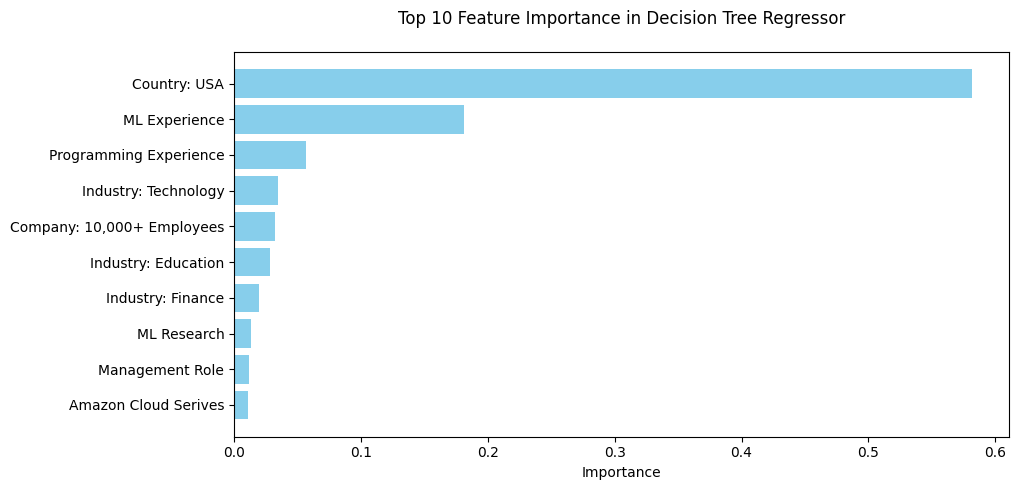

In [38]:
# Plot the top 10 most important features
plt.figure(figsize=(10, 5))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in Decision Tree Regressor', pad=20)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

**Save to Pickle File**

In [39]:
# import pickle

# # Save the trained model to a pickle file
# with open('decision_tree_regressor.pkl', 'wb') as model_file:
#     pickle.dump(regressor, model_file)

# print("Model saved successfully!")